In [66]:
import numpy as np
import pandas as pd

In [67]:
df1=pd.read_csv("/content/crime_2016.csv")
df2=pd.read_csv("/content/pollution_2016.csv")
df3=pd.read_csv("/content/trust_in_legal_2013.csv")
df4=pd.read_csv("/content/trust_in_police_2013.csv")
df5=pd.read_csv("/content/trust_in_politics_2013.csv")
df6=pd.read_csv("/content/gdp_2016.csv")
df7=pd.read_csv("/content/perceived_health_2016.csv")
df8=pd.read_csv("/content/population_2011.csv")
df9=pd.read_csv("/content/unemployment_2016.csv")

Merging all the dataframes together.

In [68]:
from functools import reduce
df=reduce(lambda x,y: pd.merge(x,y, on='country', how='inner'), 
            [df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [69]:
df.head()

,country,prct_rpt_crime,prct_rpt_pollution,legal_trust_rating,police_trust_rating,political_trust_rating,gdp,prct_health_verygood,prct_health_good,prct_health_fair,prct_health_bad,prct_health_verybad,total_pop,prct_yng_adt_pop,unemp_rate
0,Austria,12.4,10.7,6.0,7.2,4.4,356237.6,31.9,38.3,21.6,6.4,1.7,8401940,18.677544,6.0
1,Belgium,13.4,13.2,5.0,6.1,4.6,424660.3,29.8,43.9,17.0,7.2,2.0,11000638,18.485146,7.8
2,Bulgaria,25.0,15.1,3.0,3.6,2.6,48128.6,19.1,46.7,23.2,8.7,2.3,7364570,18.432577,7.6
3,Switzerland,10.9,8.9,7.0,7.4,6.6,605753.7,33.2,44.5,17.8,3.8,0.7,7954662,18.445787,5.0
4,Cyprus,9.8,9.2,3.6,4.7,2.6,18490.2,44.1,34.6,16.8,3.8,0.7,840407,23.322628,13.0


In [70]:
df['country'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Switzerland', 'Cyprus',
       'Czechia', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain',
       'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Iceland',
       'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden',
       'Slovenia', 'Slovakia', 'Turkey', 'United Kingdom'], dtype=object)

There are a total of 32 unique countries.

In [71]:
print(len(df['country'].unique()))

32


In [72]:
X = df.drop(['country'], axis = 1)

In [73]:
X.head()

,prct_rpt_crime,prct_rpt_pollution,legal_trust_rating,police_trust_rating,political_trust_rating,gdp,prct_health_verygood,prct_health_good,prct_health_fair,prct_health_bad,prct_health_verybad,total_pop,prct_yng_adt_pop,unemp_rate
0,12.4,10.7,6.0,7.2,4.4,356237.6,31.9,38.3,21.6,6.4,1.7,8401940,18.677544,6.0
1,13.4,13.2,5.0,6.1,4.6,424660.3,29.8,43.9,17.0,7.2,2.0,11000638,18.485146,7.8
2,25.0,15.1,3.0,3.6,2.6,48128.6,19.1,46.7,23.2,8.7,2.3,7364570,18.432577,7.6
3,10.9,8.9,7.0,7.4,6.6,605753.7,33.2,44.5,17.8,3.8,0.7,7954662,18.445787,5.0
4,9.8,9.2,3.6,4.7,2.6,18490.2,44.1,34.6,16.8,3.8,0.7,840407,23.322628,13.0


In [74]:
df.isnull().sum()

country                   0
prct_rpt_crime            0
prct_rpt_pollution        0
legal_trust_rating        0
police_trust_rating       0
political_trust_rating    0
gdp                       0
prct_health_verygood      0
prct_health_good          0
prct_health_fair          0
prct_health_bad           0
prct_health_verybad       0
total_pop                 0
prct_yng_adt_pop          0
unemp_rate                0
dtype: int64

In [75]:
df.describe()

,prct_rpt_crime,prct_rpt_pollution,legal_trust_rating,police_trust_rating,political_trust_rating,gdp,prct_health_verygood,prct_health_good,prct_health_fair,prct_health_bad,prct_health_verybad,total_pop,prct_yng_adt_pop,unemp_rate
count,32.000000,32.00000,32.000000,32.000000,32.00000,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.00000,3.200000e+01,32.000000,32.000000
mean,10.575000,12.87500,4.934375,6.106452,4.01875,5.218333e+05,22.990625,44.321875,23.278125,7.587500,1.80000,1.637612e+07,19.111593,8.337500
std,4.608407,5.69397,1.348741,1.052473,1.38923,7.781849e+05,10.664937,7.196224,6.288891,3.222677,0.87768,2.198819e+07,1.649615,4.393378
min,2.200000,4.60000,2.700000,3.600000,1.70000,1.034410e+04,5.100000,29.000000,13.700000,2.600000,0.50000,3.155560e+05,15.474973,3.000000
25%,8.250000,8.97500,3.750000,5.400000,2.95000,4.775632e+04,17.175000,40.575000,19.200000,5.300000,1.20000,3.974524e+06,18.336042,5.700000
50%,10.350000,12.95000,5.050000,6.100000,4.10000,2.012768e+05,22.350000,44.000000,21.950000,7.000000,1.70000,7.954662e+06,18.713960,7.300000
75%,12.875000,15.22500,5.725000,6.675000,4.92500,4.987990e+05,29.200000,46.825000,25.750000,9.250000,2.37500,1.241443e+07,20.067451,9.800000
max,25.000000,30.20000,7.500000,8.200000,6.60000,3.159750e+06,45.000000,62.300000,39.600000,14.800000,3.80000,8.021970e+07,23.322628,23.600000


We will use elbow method to find the number of clusters that is best suited.

In [76]:
from sklearn.cluster import KMeans
sq_dist=[] # initialize

for k in range(1,8):
    km=KMeans(n_clusters=k)
    km=km.fit(X)
    sq_dist.append(km.inertia_)

Plotting the variation of sum of squared distance with increasing k (no of clusters)

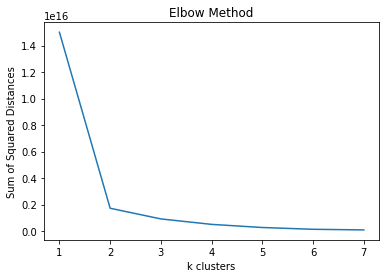

In [77]:
import matplotlib.pyplot as plt

plt.plot(range(1,8),sq_dist)
plt.xlabel('k clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Use of silhouette to find optimal number of clusters.

In [78]:
from sklearn.metrics import silhouette_samples, silhouette_score
avg_score = []
for n_clusters in range(2,8): 
    clusterer=KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    avg_score.append(silhouette_avg)
    print("When clusters = ",n_clusters, "the average silhouette score is", round(silhouette_avg,3))

When clusters =  2 the average silhouette score is 0.838
When clusters =  3 the average silhouette score is 0.786
When clusters =  4 the average silhouette score is 0.59
When clusters =  5 the average silhouette score is 0.587
When clusters =  6 the average silhouette score is 0.621
When clusters =  7 the average silhouette score is 0.629


Plotting variation of silhoutte to number of clusters. In both the methods used we see that k = 2 is the best choice as there was elbow for k = 2 and the average silhouette is also maximum for k = 2

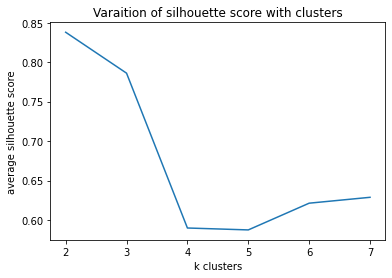

In [79]:
plt.plot(range(2,8),avg_score)
plt.xlabel('k clusters')
plt.ylabel('average silhouette score')
plt.title('Varaition of silhouette score with clusters')
plt.show()

Training the model.

In [80]:
kmeans=KMeans(n_clusters=2)
kmeans=kmeans.fit(X)

In [81]:
kmeans.inertia_

1720958280941978.0

In [82]:
kmeans.cluster_centers_

array([[1.00807692e+01, 1.26576923e+01, 5.06538462e+00, 6.17717122e+00,
        4.20769231e+00, 2.18148077e+05, 2.39615385e+01, 4.34038462e+01,
        2.31115385e+01, 7.65384615e+00, 1.84230769e+00, 6.59254931e+06,
        1.93050172e+01, 8.08846154e+00],
       [1.27166667e+01, 1.38166667e+01, 4.36666667e+00, 5.80000000e+00,
        3.20000000e+00, 1.83780252e+06, 1.87833333e+01, 4.83000000e+01,
        2.40000000e+01, 7.30000000e+00, 1.61666667e+00, 5.87715823e+07,
        1.82734199e+01, 9.41666667e+00]])

In [83]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

Getting names of all the attributes.

In [84]:
col=list(X.columns.values) 

In [85]:
col

['prct_rpt_crime',
 'prct_rpt_pollution',
 'legal_trust_rating',
 'police_trust_rating',
 'political_trust_rating',
 'gdp',
 'prct_health_verygood',
 'prct_health_good',
 'prct_health_fair',
 'prct_health_bad',
 'prct_health_verybad',
 'total_pop',
 'prct_yng_adt_pop',
 'unemp_rate']

In [86]:
count=df.iloc[:,0]

In [87]:
cluster_centres = kmeans.cluster_centers_.round(2)

In [88]:
ctr=pd.DataFrame(cluster_centres,columns=col)

In [89]:
ctr

,prct_rpt_crime,prct_rpt_pollution,legal_trust_rating,police_trust_rating,political_trust_rating,gdp,prct_health_verygood,prct_health_good,prct_health_fair,prct_health_bad,prct_health_verybad,total_pop,prct_yng_adt_pop,unemp_rate
0,10.08,12.66,5.07,6.18,4.21,218148.08,23.96,43.4,23.11,7.65,1.84,6592549.31,19.31,8.09
1,12.72,13.82,4.37,5.80,3.20,1837802.52,18.78,48.3,24.00,7.30,1.62,58771582.33,18.27,9.42


In [90]:
df_centroids = ctr.transpose()

In [91]:
df_centroids

,0,1
prct_rpt_crime,10.08,12.72
prct_rpt_pollution,12.66,13.82
legal_trust_rating,5.07,4.37
police_trust_rating,6.18,5.80
political_trust_rating,4.21,3.20
gdp,218148.08,1837802.52
prct_health_verygood,23.96,18.78
prct_health_good,43.40,48.30
prct_health_fair,23.11,24.00
prct_health_bad,7.65,7.30


In [92]:
count_label=kmeans.labels_+1
i
ctry_sum={'country': count,
          'cluster': count_label} 
ctry_sum=pd.DataFrame(ctry_sum,columns=['country','cluster'])

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [96]:
ctry_sum

,country,cluster
0,Austria,1
1,Belgium,1
2,Bulgaria,1
3,Switzerland,1
4,Cyprus,1
5,Czechia,1
6,Germany,2
7,Denmark,1
8,Estonia,1
9,Greece,1


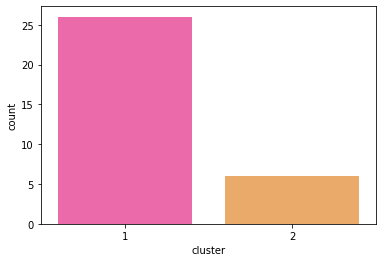

In [99]:
import seaborn as sns
sns.countplot(x ='cluster', data = ctry_sum, palette = 'spring')
plt.show()